<a href="https://colab.research.google.com/github/wilsonfffs/tarea-visualizaci-n/blob/main/Matriz_de_confusi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix

In [14]:
filename = '/content/drive/MyDrive/Coding Dojo /Codigo /week4/titanic(1).csv'
df = pd.read_csv(filename)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
from sklearn.utils.extmath import log_logistic
# Transforma la columna Sexo en una forma que no sea de texto
# Elijo cuatro funciones, podrías haber elegido otras
feature_cols = ['Pclass','Parch','Age','Sex']
feature_cols
# Convierta la columna Sexo en algo que pueda alimentar a un modelo
# Tiene
df['Sex'] = df.Sex.map({'male':0,'female':1})
df
# Eliminar filas donde la edad es nan del conjunto de datos
df = df.loc[~df['Age'].isnull(), :]
# Crear una matriz de caracteristicas y vector objetivo 
# Crear matriz de características y vector objetivo
X = df.loc[:, feature_cols]
y = y = df['Survived']
#y
# Divida los datos en conjuntos de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
#X_train
# Estandarizar datos
scaler = StandardScaler()
# Ajusta solo en el conjunto de entrenamiento
scaler.fit(X_train)
# Aplicar transformación tanto al conjunto de entrenamiento como al conjunto de prueba
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Crea una instancia de un modelo
logreg = LogisticRegression()
#Entrenar el modelo de Datos 
logreg.fit(X_train,y_train);
#Predicciones de Clase (no probabilidades predichas)
prediction = logreg.predict(X_test)
prediction

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0])

In [17]:
# ignorar por ahora
score = logreg.score(X_test, y_test)
print(score)

0.8156424581005587


In [18]:
prediction

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0])

In [19]:
cm = metrics.confusion_matrix(y_test.values, prediction)
cm

array([[87, 16],
       [17, 59]])

In [ ]:
cm.shape

(2, 2)

In [ ]:
cm.ravel()

array([87, 16, 17, 59])

In [ ]:
cm.ravel().shape

(4,)

In [ ]:
tn, fp, fn, tp = cm.ravel()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Accuracy Score: 0.8156424581005587')

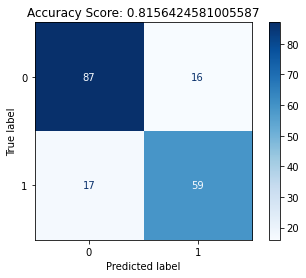

In [32]:
plot_confusion_matrix(logreg, X_test, y_test, cmap = 'Blues');
plt.title("Accuracy Score: 0.8156424581005587")

#plt.xlabel('Predicted lable')
#plt.ylable('Actula Level')